In [ ]:
!pip install ray[rllib]
!pip install gymnasium[accept-rom-license]
!pip install gymnasium[atari]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=b0c4e216912ca92b7a756e1df40d6e67dd41457e092f1526dda7e7a07618318e
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.5 MB/s eta 0:00:00


In [ ]:
import gymnasium
import matplotlib.pyplot as plt
import ray
from ray import tune

In [ ]:
config = {
    "env": "ALE/Pong-v5",
    #"num_env_runners":2,
    "gamma": 0.99,
    "framework": "torch",
    #"dueling": True,
    #"double_q": True,
    "lr": 0.0001,
    "replay_buffer_config": {
        "type": "MultiAgentPrioritizedReplayBuffer",  # Use prioritized replay buffer
        "capacity": 50000
        #"prioritized_replay_alpha": 0.6,
        #"prioritized_replay_beta": 0.4,
        #"prioritized_replay_eps": 1e-6,
        },
    #"timestep_per_iterations": 10000,
    "exploration_config": {
        "epsilon_timesteps": 200000,
        "final_epsilon": .01
        },
    "train_batch_size": 32,
    "model": {
        "grayscale": True,
        "zero_mean": False,
        "dim": 42
        },
    "compress_observations": True,
    "env_config":{
        "frameskip": 1,
        "full_action_space": False,
        "repeat_action_probability": 0.0
        },
    "num_steps_sampled_before_learning_starts": 10000,
    "rollout_fragment_length": 4,
    "num_gpus": 0

}

stop_criteria = {
    "episode_reward_mean": 20,
    "time_total_s": 7200
}

try:
    result = tune.run('DQN', config=config, stop=stop_criteria)
    print("Training completed successfully.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

+------------------------------------------------------------+
| Configuration for experiment     DQN_2024-05-11_22-04-41   |
+------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator     |
| Scheduler                        FIFOScheduler             |
| Number of trials                 1                         |
+------------------------------------------------------------+

View detailed results here: /root/ray_results/DQN_2024-05-11_22-04-41
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-11_22-03-05_858821_166/artifacts/2024-05-11_22-04-41/DQN_2024-05-11_22-04-41/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-11 22:04:41. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+----------------------------------------+
| Trial name                    status   |
+----------------------------------------+
| DQN_ALE_Pong-v5_77bd0_00000   PENDING  |

(pid=1681) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=1681)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=1681) 2024-05-11 22:04:54,088	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(DQN pid=1681) 2024-05-11 22:04:54,089	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=1681) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=1681) [Powered by Stella]



Trial DQN_ALE_Pong-v5_77bd0_00000 started with configuration:
+-------------------------------------------------------------------+
| Trial DQN_ALE_Pong-v5_77bd0_00000 config                          |
+-------------------------------------------------------------------+
| compress_observations                                        True |
| env                                                   ALE/Pong-v5 |
| env_config/frameskip                                            1 |
| env_config/full_action_space                                False |
| env_config/repeat_action_probability                          0.0 |
| exploration_config/epsilon_timesteps                       200000 |
| exploration_config/final_epsilon                             0.01 |
| framework                                                   torch |
| gamma                                                        0.99 |
| lr                                                         0.0001 |
| model/dim                

(DQN pid=1681) Install gputil for GPU system monitoring.
(DQN pid=1681) 2024-05-11 22:04:57,220	WARNING multi_agent_prioritized_replay_buffer.py:215 -- Adding batches with column `weights` to this buffer while providing weights as a call argument to the add method results in the column being overwritten.



Trial DQN_ALE_Pong-v5_77bd0_00000 finished iteration 1 at 2024-05-11 22:05:07. Total running time: 26s
+---------------------------------------------------+
| Trial DQN_ALE_Pong-v5_77bd0_00000 result          |
+---------------------------------------------------+
| env_runner_results/episode_len_mean           nan |
| env_runner_results/episode_return_mean        nan |
| num_env_steps_sampled_lifetime               1000 |
+---------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-11 22:05:12. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status       iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------

(DQN pid=1681) 2024-05-11 22:06:43,399	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial status: 1 RUNNING
Current time: 2024-05-11 22:07:12. Total running time: 2min 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_ALE_Pong-v5_77bd0_00000   RUNNING        10            105.768   10000   -19.7778                    -18                    -21              3951.44                      1 |
+-------------------------------------------------------------------------------------------------------------------------------------------------

2024-05-11 23:02:36,105	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-05-11 23:02:36,127	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-11 23:02:36,131	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/DQN_2024-05-11_22-04-41' in 0.0228s.


Trial status: 1 RUNNING
Current time: 2024-05-11 23:02:36. Total running time: 57min 54s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_ALE_Pong-v5_77bd0_00000   RUNNING        76            3432.38   76000   -20.2125                    -18                    -21              3739.28                      1 |
+-------------------------------------------------------------------------------------------------------------------------------------------------

2024-05-11 23:02:46,156	WARNING tune.py:1054 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: tune.run(..., resume=True)



Training completed successfully.


In [ ]:
df = result.results_df

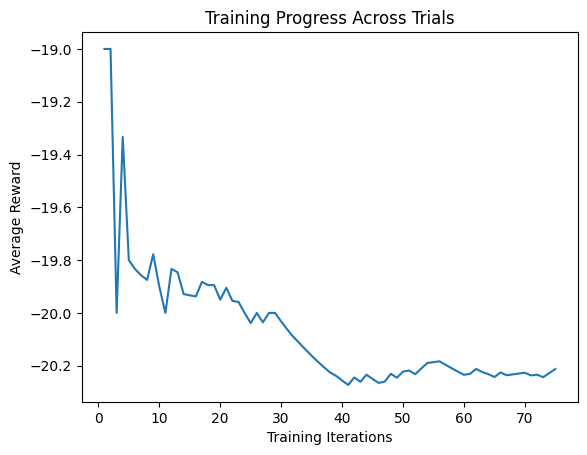

In [ ]:
all_rewards = result.trial_dataframes
for trial_name, df in all_rewards.items():
    plt.plot(df['episode_reward_mean'], label=f'Trial {trial_name}')

plt.xlabel('Training Iterations')
plt.ylabel('Average Reward')
plt.title('Training Progress Across Trials')
#plt.legend()
plt.grid(False)
plt.show()